<a href="https://colab.research.google.com/github/MFaeli/Culvert/blob/main/11012023_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Importing the dataset**

In [2]:

# Load the CSV file
df = pd.read_csv('GIS_Column_Edited_UTF_8.csv')

# Apply the filters
filtered_df = df[
    (df.iloc[:, 11] == 'Round') &
    (df.iloc[:, 19] != 0) & (df.iloc[:, 19] != '') &
    (df.iloc[:, 19] <= 1000) &
    (df.iloc[:, 20] != 0) & (df.iloc[:, 20] != '') &
    (df.iloc[:, 20] <= 50) &
    (df.iloc[:, 41] != '') &
    (df.iloc[:, 43] != '') &
    (df.iloc[:, 13] != 0) & (df.iloc[:, 13] != '') &
    (df.iloc[:, 13] <= 130)
]




num_rows = filtered_df.shape[0]
print("Number of rows in the filtered DataFrame:", num_rows)




X = filtered_df.iloc[:, [13, 20]].values




<ipython-input-2-06e001a834cf>:2: DtypeWarning: Columns (1,39,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GIS_Column_Edited_UTF_8.csv')


Number of rows in the filtered DataFrame: 24028


In [3]:
print(X)

[[36.  4.]
 [36. 15.]
 [24.  4.]
 ...
 [36.  6.]
 [18.  2.]
 [24.  4.]]


**Using the elbow method to find the optimal number of clusters**

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", n_init=10, random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


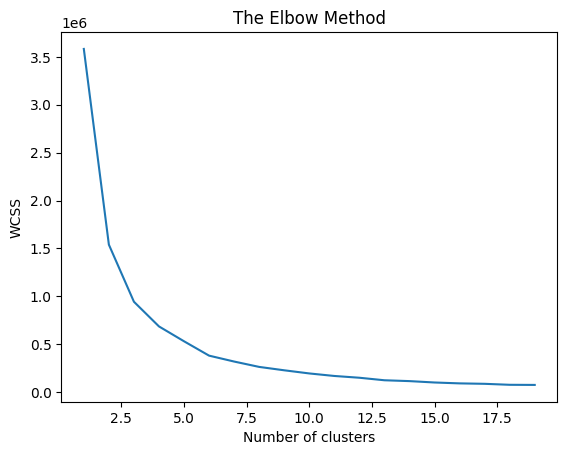

In [5]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training K-Means Model on the dataset**

In [6]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
print(y_kmeans)

[0 0 1 ... 0 4 1]


**Visualizing the Clusters**

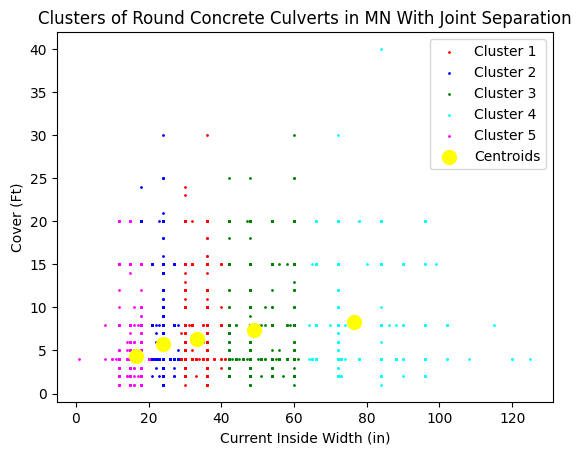

In [8]:
plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans== 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans== 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans== 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s = 1, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = 'Centroids')
plt.title('Clusters of Round Concrete Culverts in MN With Joint Separation')
plt.xlabel('Current Inside Width (in)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()

In [9]:
# Given clustering
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Define a color map for clusters
color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}

# Define a label map for clusters
label_map = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5'
}

# Displaying the coordinates of each centroid
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    print(f"{label_map[i]} (Color: {color_map[i]}): X: {x:.2f}, Y: {y:.2f}")









Cluster 1 (Color: red): X: 33.41, Y: 6.30
Cluster 2 (Color: blue): X: 23.98, Y: 5.71
Cluster 3 (Color: green): X: 48.87, Y: 7.35
Cluster 4 (Color: cyan): X: 76.53, Y: 8.27
Cluster 5 (Color: magenta): X: 16.67, Y: 4.41


In [10]:
from sklearn.cluster import KMeans
from collections import Counter

# Given clustering
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Define a color map for clusters
color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}

# Count data points in each cluster
cluster_counts = Counter(y_kmeans)

# Displaying the count and color for each cluster
for cluster, count in cluster_counts.items():
    print(f"{cluster}: {count} data points (Color: {color_map[cluster]})")


0: 5459 data points (Color: red)
1: 10536 data points (Color: blue)
2: 2309 data points (Color: green)
4: 5291 data points (Color: magenta)
3: 433 data points (Color: cyan)


plot the cases just in blue cluster


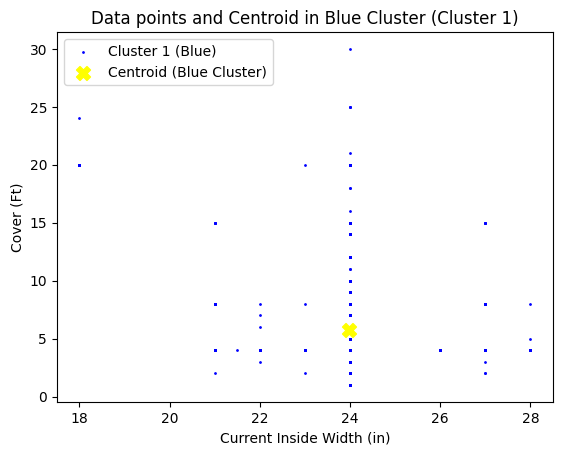

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for Cluster 1 (blue cluster) data points
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 1 (Blue)')

# Scatter plot for the centroid of Cluster 1 (blue cluster)
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s = 100, c = "yellow", marker="X", label = 'Centroid (Blue Cluster)')

plt.title('Data points and Centroid in Blue Cluster (Cluster 1)')
plt.xlabel('Current Inside Width (in)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()



In [12]:
# Count the number of cases in Cluster 1 (blue cluster)
blue_cluster_count = (y_kmeans == 1).sum()

print(f"There are {blue_cluster_count} cases in the blue cluster.")


There are 10536 cases in the blue cluster.


**plot the cases just in magenta cluster and its centroid**

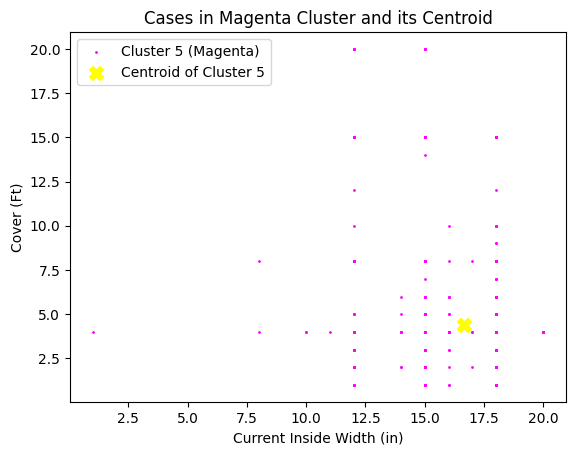

In [13]:
import matplotlib.pyplot as plt

# Plotting the data points in the magenta cluster
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Cluster 5 (Magenta)')

# Plotting the centroid of the magenta cluster
plt.scatter(kmeans.cluster_centers_[4, 0], kmeans.cluster_centers_[4, 1], s = 100, c = "yellow", marker='X', label = 'Centroid of Cluster 5')

plt.title('Cases in Magenta Cluster and its Centroid')
plt.xlabel('Current Inside Width (in)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()


In [14]:
# Counting the number of cases in the magenta cluster
magenta_cluster_count = sum(y_kmeans == 4)

print(f"There are {magenta_cluster_count} cases in the magenta cluster.")


There are 5291 cases in the magenta cluster.


**Max and Min**

In [15]:
# Find the 10 'current inside widths' with the most cases
top_widths = filtered_df.iloc[:, 13].value_counts().head(10)

# Print the top 10 most frequent 'current inside widths'
print("The 10 'current inside widths' with the most cases:")
print(top_widths)

The 10 'current inside widths' with the most cases:
24.0    10310
18.0     3596
36.0     3048
30.0     2322
48.0     1073
15.0      944
12.0      661
42.0      616
60.0      361
72.0      226
Name: Current Inside Width (in), dtype: int64
